# Variable Selection (Correlación vs Mutual Information)

## 1. Importar librerias 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import mutual_info_regression

## 2. Carga del dataset de California Housing

In [32]:
# Cargar dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Revisar las primeras filas
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3. Correlacion de Pearson

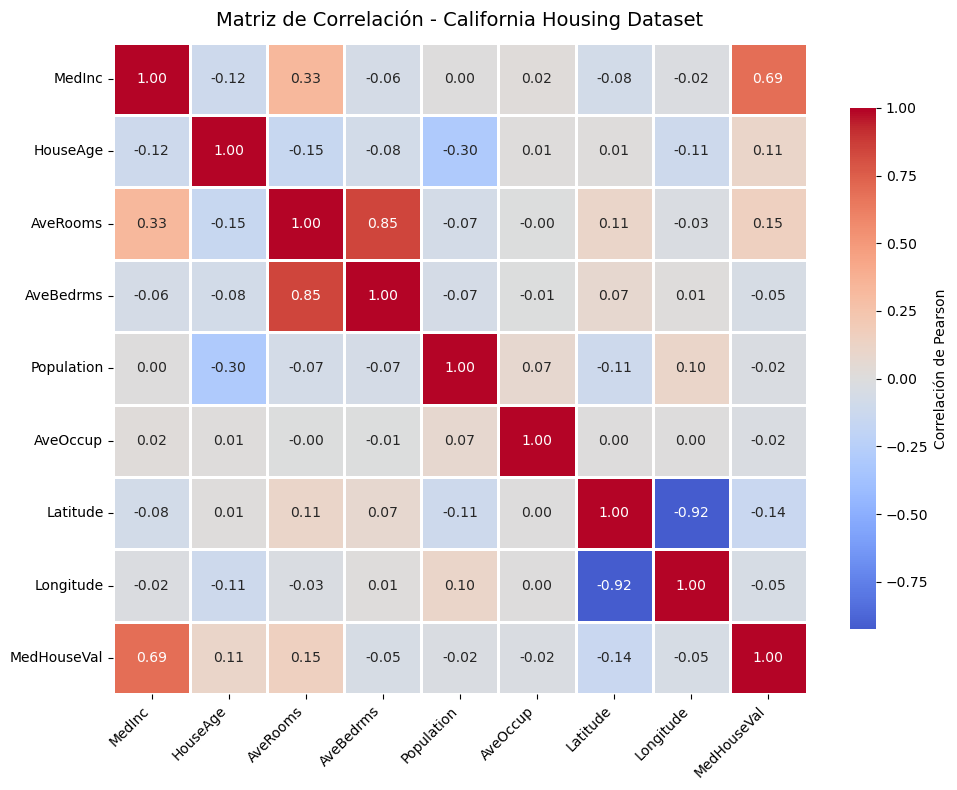

In [33]:
corr = df.corr()

plt.figure(figsize=(10,8))

# Heatmap con anotaciones 
sns.heatmap(
    corr, 
    annot=True,        # mostrar valores dentro de las celdas
    fmt=".2f",         # formato de 2 decimales
    cmap="coolwarm",   # colores de -1 a 1
    center=0, 
    linewidths=0.8,    # líneas entre celdas
    cbar_kws={"shrink": .8, "label": "Correlación de Pearson"}
)

plt.title("Matriz de Correlación - California Housing Dataset", fontsize=14, pad=12)
plt.xticks(rotation=45, ha="right")  # rotar etiquetas X para mejor lectura
plt.yticks(rotation=0)               # mantener etiquetas Y horizontales
plt.tight_layout()
plt.show()


In [34]:

# Calcular correlaciones con el target
corr_target = df.corr()[["MedHouseVal"]].sort_values(by="MedHouseVal", ascending=False)

print("Correlación de cada variable con MedHouseVal:\n")
print(corr_target)



Correlación de cada variable con MedHouseVal:

             MedHouseVal
MedHouseVal     1.000000
MedInc          0.688075
AveRooms        0.151948
HouseAge        0.105623
AveOccup       -0.023737
Population     -0.024650
Longitude      -0.045967
AveBedrms      -0.046701
Latitude       -0.144160


## 4. Mutual Information

Puntajes de Información Mutua con respecto a MedHouseVal:
Longitude     0.399598
MedInc        0.387090
Latitude      0.371354
AveRooms      0.102874
AveOccup      0.072716
HouseAge      0.033324
AveBedrms     0.024346
Population    0.020878
dtype: float64


/tmp/ipykernel_16358/4058272488.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores.values, y=mi_scores.index, palette="viridis")


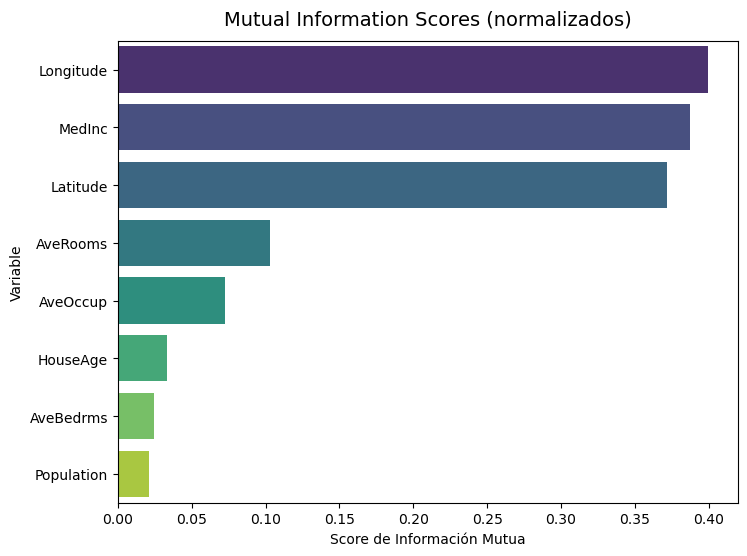

In [35]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

mi = mutual_info_regression(X_scaled, y, random_state=42)

mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Puntajes de Información Mutua con respecto a MedHouseVal:")
print(mi_scores)

plt.figure(figsize=(8,6))
sns.barplot(x=mi_scores.values, y=mi_scores.index, palette="viridis")
plt.title("Mutual Information Scores (normalizados)", fontsize=14, pad=12)
plt.xlabel("Score de Información Mutua")
plt.ylabel("Variable")
plt.show()


#### 4.1 Mapa de distribución geográfica de precios de vivienda  (variables con mas peso)


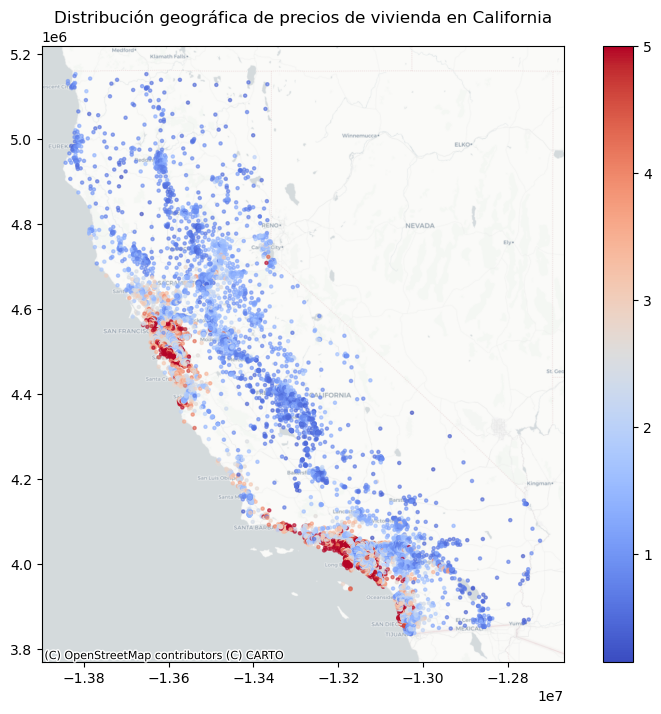

In [36]:
import geopandas as gpd
import contextily as ctx

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]),
    crs="EPSG:4326"   # sistema de coordenadas (lat/lon)
)

# Convertir a proyección métrica 
gdf = gdf.to_crs(epsg=3857)

# Graficar
ax = gdf.plot(
    column="MedHouseVal",
    cmap="coolwarm",
    markersize=5,
    alpha=0.6,
    legend=True,
    figsize=(10,8)
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Distribución geográfica de precios de vivienda en California")
plt.show()



## 5. Comparacion de correlacion y mutual information

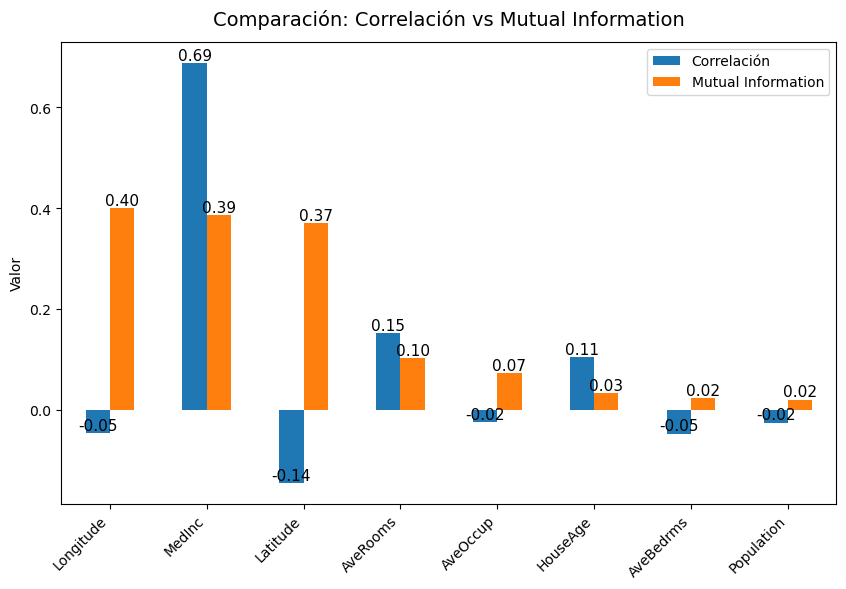

In [ ]:
# Ordenar variables por importancia (ej: por MI)
comparison_sorted = comparison.sort_values("Mutual Information", ascending=False)

# Crear gráfico de barras
ax = comparison_sorted.plot.bar(figsize=(10,6))
plt.title("Comparación: Correlación vs Mutual Information", fontsize=14, pad=12)
plt.ylabel("Valor")
plt.xticks(rotation=45, ha="right")

# Añadir los valores numéricos a cada barra
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",   
        (p.get_x() + p.get_width() / 2., p.get_height()),  # posición
        ha="center", va="bottom", fontsize=11, rotation=0, color="black"
    )

plt.show()

